1. Supervised, Semi-Supervised, and Unsupervised Learning

(a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+
%28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/
machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which
has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has
two output classes.

In [15]:
import pandas as pd
import numpy as np

data = pd.read_csv('../data/Homework 6 Data/wdbc.data', header=None)
data.replace('M', 1, inplace=True)
data.replace('B', 0, inplace=True)
data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


(b) use 20% of both the positve and negative classes as the test set

In [22]:
from sklearn.model_selection import train_test_split
data_x, data_y = data.drop([0,1],axis=1), data[1]
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=233, stratify=data_y)
x_train

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
226,10.440,15.46,66.62,329.6,0.10530,0.07722,0.006643,0.012160,0.1788,0.06450,...,11.52,19.80,73.47,395.4,0.13410,0.11530,0.02639,0.04464,0.2615,0.08269
457,13.210,25.25,84.10,537.9,0.08791,0.05205,0.027720,0.020680,0.1619,0.05584,...,14.35,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788
187,11.710,17.19,74.68,420.3,0.09774,0.06141,0.038090,0.032390,0.1516,0.06095,...,13.01,21.39,84.42,521.5,0.13230,0.10400,0.15210,0.10990,0.2572,0.07097
33,19.270,26.47,127.90,1162.0,0.09401,0.17190,0.165700,0.075930,0.1853,0.06261,...,24.15,30.90,161.40,1813.0,0.15090,0.65900,0.60910,0.17850,0.3672,0.11230
477,13.900,16.62,88.97,599.4,0.06828,0.05319,0.022240,0.013390,0.1813,0.05536,...,15.14,21.80,101.20,718.9,0.09384,0.20060,0.13840,0.06222,0.2679,0.07698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,13.900,19.24,88.73,602.9,0.07991,0.05326,0.029950,0.020700,0.1579,0.05594,...,16.41,26.42,104.40,830.5,0.10640,0.14150,0.16730,0.08150,0.2356,0.07603
158,12.060,12.74,76.84,448.6,0.09311,0.05241,0.019720,0.019630,0.1590,0.05907,...,13.14,18.41,84.08,532.8,0.12750,0.12320,0.08636,0.07025,0.2514,0.07898
171,13.430,19.63,85.84,565.4,0.09048,0.06288,0.058580,0.034380,0.1598,0.05671,...,17.98,29.87,116.60,993.6,0.14010,0.15460,0.26440,0.11600,0.2884,0.07371
503,23.090,19.83,152.10,1682.0,0.09342,0.12750,0.167600,0.100300,0.1505,0.05484,...,30.79,23.87,211.50,2782.0,0.11990,0.36250,0.37940,0.22640,0.2908,0.07277


In [23]:
data_y.value_counts()

0    357
1    212
Name: 1, dtype: int64

In [24]:
y_test.value_counts()

0    72
1    42
Name: 1, dtype: int64

(b) Monte-Carlo Simulation: Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision,
recall, F1-score, and AUC) that you obtain from each algorithm.

i. Supervised Learning: Train an L1-penalized SVM to classify the data.
Use 5 fold cross validation to choose the penalty parameter. Use normalized
data. Report the average accuracy, precision, recall, F1-score, and AUC, for
both training and test sets over your M runs. Plot the ROC and report the
confusion matrix for training and testing in one of the runs.

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, f1_score, recall_score
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

def supervised_learning(x_train, y_train, x_test, y_test, is_plot):
    c_list = [10**c for c in np.arange(-3,7, dtype=float)]
    parameters = {'C':c_list}
    svc = LinearSVC(penalty='l1', dual=False)
    clf = GridSearchCV(svc, parameters, cv=5)
    clf.fit(x_train, y_train)
    best_C = clf.best_params_['C']
    # L1 svm model
    svc = LinearSVC(penalty='l1', dual=False, C=best_C)
    svc.fit(x_train, y_train)
    
    # accuracy
    train_accuracy = svc.score(x_train, y_train)
    test_accuracy = svc.score(x_test, y_test)
    # confusion matrix
    y_train_predict = svc.predict(x_train)
    y_test_predict = svc.predict(x_test)
    train_confusion_matrix = confusion_matrix(y_train, y_train_predict)
    test_confusion_matrix = confusion_matrix(y_test, y_test_predict)
    # precision
    train_precision = precision_score(y_train, y_train_predict)  
    test_precision = precision_score(y_test, y_test_predict)  
    # recall
    train_recall = recall_score(y_train, y_train_predict)  
    test_recall = recall_score(y_test, y_test_predict) 
    # f1
    train_f1 = f1_score(y_train, y_train_predict)  
    test_f1 = f1_score(y_test, y_test_predict) 
    # AUC
    train_predict_prob = svc.decision_function(x_train)
    test_predict_prob = svc.decision_function(x_test)
    train_auc = roc_auc_score(y_train, train_predict_prob)
    test_auc = roc_auc_score(y_test, test_predict_prob)

    if is_plot:
        print('Plot the ROC and report the confusion matrix for training and testing in one of the runs:')
        train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_predict_prob)
        test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_predict_prob)
        print('Train Confusion Matrix:\n', train_confusion_matrix)
        print('Test Confusion Matrix:\n', test_confusion_matrix)
        plt.plot(train_fpr, train_tpr, label='Train ROC curve')
        plt.plot(test_fpr, test_tpr, label='Test ROC curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()
    
    return [train_accuracy, train_precision, train_recall, train_f1, train_auc, test_accuracy, test_precision, test_recall, test_f1, test_auc]

Plot the ROC and report the confusion matrix for training and testing in one of the runs:
Train Confusion Matrix:
 [[282   3]
 [  6 164]]
Test Confusion Matrix:
 [[70  2]
 [ 3 39]]


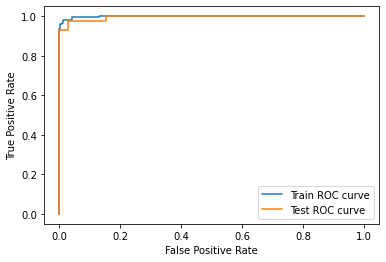

Spuervised AVG Score:
 Train Accuracy     0.984689
Train Precision    0.987466
Train Recall       0.971373
Train F1-Score     0.979338
Train Auc          0.998648
Test Accuracy      0.961988
Test Precision     0.963305
Test Recall        0.933333
Test F1-Score      0.947430
Test Auc           0.993011
dtype: float64


In [274]:
cols = ['Train Accuracy', 'Train Precision', 'Train Recall', 'Train F1-Score', 'Train Auc', 'Test Accuracy',  'Test Precision', 'Test Recall', 'Test F1-Score', 'Test Auc']
supervised_stat = pd.DataFrame(columns=cols, index=range(30))
is_plot = True
for i in range(30):
    x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=i, stratify=data_y)
    normalized_x_train = pd.DataFrame(normalize(x_train))
    normalized_x_test = pd.DataFrame(normalize(x_test))
    supervised_stat.loc[i] = supervised_learning(normalized_x_train, y_train, normalized_x_test, y_test, is_plot)
    is_plot = False

print('Spuervised AVG Score:\n', supervised_stat.mean())

ii. Semi-Supervised Learning/ Self-training: select 50% of the positive
class along with 50% of the negative class in the training set as labeled data
and the rest as unlabelled data. You can select them randomly.

A. Train an L1-penalized SVM to classify the labeled data Use normalized
data. Choose the penalty parameter using 5 fold cross validation.

In [54]:
normalized_x_train_labeled, normalized_x_train_unlabeled, y_train_labeled, y_train_unlabeled = train_test_split(normalized_x_train, y_train, test_size=0.5, random_state=233, stratify=y_train)
# choose the parameter
c_list = [10**c for c in np.arange(-3,7, dtype=float)]
parameters = {'C':c_list}
svc = LinearSVC(penalty='l1', dual=False)
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(x_train_labeled, y_train_labeled)
best_C = clf.best_params_['C']
# build L1 svm model using best C
print('best C choosed by cross validation is:', best_C)
svc = LinearSVC(penalty='l1', dual=False, C=best_C)
svc.fit(x_train_labeled, y_train_labeled)

best C choosed by cross validation is: 100000.0


LinearSVC(C=100000.0, dual=False, penalty='l1')

B. Find the unlabeled data point that is the farthest to the decision boundary
of the SVM. Let the SVM label it (ignore its true label), and add it to
the labeled data, and retrain the SVM. Continue this process until all
unlabeled data are used. Test the final SVM on the test data andthe
average accuracy, precision, recall, F1-score, and AUC, for both training
and test sets over your M runs. Plot the ROC and report the confusion
matrix for training and testing in one of the runs.

In [67]:
def semi_supervised_learning(x_train, x_train_unlabeled, y_train, x_test, y_test, is_plot):
    c_list = [10**c for c in np.arange(-3,7, dtype=float)]
    parameters = {'C':c_list}
    svc = LinearSVC(penalty='l1', dual=False)
    clf = GridSearchCV(svc, parameters, cv=5)
    clf.fit(x_train, y_train)
    best_C = clf.best_params_['C']
    # L1 svm model
    svc = LinearSVC(penalty='l1', dual=False, C=best_C)
    svc.fit(x_train, y_train)
    # Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it
    while len(x_train_unlabeled) > 0:
        # print(len(x_train_unlabeled),len(x_train))
        # calculate the distance of each data
        distance_decision_boundary = svc.decision_function(x_train_unlabeled)
        abs_distance = np.abs(distance_decision_boundary)
        # get the index of max distance
        indx = abs_distance.argmax()
        # get the label for farthest point
        label_predict = 0 if distance_decision_boundary[indx] < 0 else 1
        # append new label into train set
        x_train = np.append(x_train, [x_train_unlabeled.iloc[indx]], axis = 0)
        y_train = y_train.append(pd.Series(label_predict))
        # delete label from test set
        x_train_unlabeled = x_train_unlabeled.drop(x_train_unlabeled.index[indx])
        # refit the model
        svc.fit(x_train, y_train)
    
    # accuracy
    train_accuracy = svc.score(x_train, y_train)
    test_accuracy = svc.score(x_test, y_test)
    # confusion matrix
    y_train_predict = svc.predict(x_train)
    y_test_predict = svc.predict(x_test)
    train_confusion_matrix = confusion_matrix(y_train, y_train_predict)
    test_confusion_matrix = confusion_matrix(y_test, y_test_predict)
    # precision
    train_precision = precision_score(y_train, y_train_predict)  
    test_precision = precision_score(y_test, y_test_predict)  
    # recall
    train_recall = recall_score(y_train, y_train_predict)  
    test_recall = recall_score(y_test, y_test_predict) 
    # f1
    train_f1 = f1_score(y_train, y_train_predict)  
    test_f1 = f1_score(y_test, y_test_predict) 
    # AUC
    train_predict_prob = svc.decision_function(x_train)
    test_predict_prob = svc.decision_function(x_test)
    train_auc = roc_auc_score(y_train, train_predict_prob)
    test_auc = roc_auc_score(y_test, test_predict_prob)

    if is_plot:
        print('Plot the ROC and report the confusion matrix for training and testing in one of the runs:')
        train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_predict_prob)
        test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_predict_prob)
        print('Train Confusion Matrix:\n', train_confusion_matrix)
        print('Test Confusion Matrix:\n', test_confusion_matrix)
        plt.plot(train_fpr, train_tpr, label='Train ROC curve')
        plt.plot(test_fpr, test_tpr, label='Test ROC curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()
    
    return [train_accuracy, train_precision, train_recall, train_f1, train_auc, test_accuracy, test_precision, test_recall, test_f1, test_auc]

  0%|          | 0/30 [00:00<?, ?it/s]

Plot the ROC and report the confusion matrix for training and testing in one of the runs:
Train Confusion Matrix:
 [[292   1]
 [  2 160]]
Test Confusion Matrix:
 [[71  1]
 [ 4 38]]


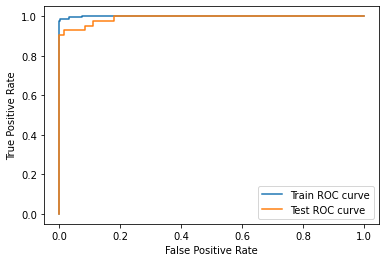

100%|██████████| 30/30 [02:03<00:00,  4.10s/it]

Semi-Spuervised AVG Score:
 Train Accuracy     0.995092
Train Precision    0.996623
Train Recall       0.990079
Train F1-Score     0.993327
Train Auc          0.999586
Test Accuracy      0.951462
Test Precision     0.944718
Test Recall        0.923810
Test F1-Score      0.933296
Test Auc           0.988668
dtype: float64


In [273]:
from tqdm import tqdm
cols = ['Train Accuracy', 'Train Precision', 'Train Recall', 'Train F1-Score', 'Train Auc', 'Test Accuracy',  'Test Precision', 'Test Recall', 'Test F1-Score', 'Test Auc']
semi_supervised_stat = pd.DataFrame(columns=cols, index=range(30))
is_plot = True
for i in tqdm(range(30)):
    x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=i, stratify=data_y)
    normalized_x_train = pd.DataFrame(normalize(x_train))
    normalized_x_test = pd.DataFrame(normalize(x_test))
    normalized_x_train_labeled, normalized_x_train_unlabeled, y_train_labeled, y_train_unlabeled = train_test_split(normalized_x_train, y_train, test_size=0.5, random_state=i, stratify=y_train)
    semi_supervised_stat.loc[i] = semi_supervised_learning(normalized_x_train_labeled, normalized_x_train_unlabeled, y_train_labeled, normalized_x_test, y_test, is_plot)
    is_plot = False
print('Semi-Spuervised AVG Score:\n', semi_supervised_stat.mean())

iii. Unsupervised Learning: Run k-means algorithm on the whole training
set. Ignore the labels of the data, and assume k = 2.

A. Run the k-means algorithm multiple times. Make sure that you initialize
the algoritm randomly. How do you make sure that the algorithm was
not trapped in a local minimum?

# To avoid local minimum, we can set the n_init large to run k-means multiple times and then choosing the best out of that (the run that gives the lowest error).

In [69]:
from sklearn.cluster import KMeans
for i in range(30):
    clusterer = KMeans(n_clusters=2, n_init = 100, random_state=i).fit(normalized_x_train)

B. Compute the centers of the two clusters and find the closest 30 data
points to each center. Read the true labels of those 30 data points and
take a majority poll within them. The majority poll becomes the label
predicted by k-means for the members of each cluster. Then compare the
labels provided by k-means with the true labels of the training data and
report the average accuracy, precision, recall, F1-score, and AUC over M
runs, and ROC and the confusion matrix for one of the runs.1

C. Classify test data based on their proximity to the centers of the clusters.
Report the average accuracy, precision, recall, F1-score, and AUC over
M runs, and ROC and the confusion matrix for one of the runs for the
test data.2

In [246]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import accuracy_score
from scipy.special import softmax

def unsupervised_learning(x_train, y_train, x_test, y_test, is_plot):
    clusterer = KMeans(n_clusters=2, n_init = 100).fit(x_train)
    labels = clusterer.labels_
    l_train, l_test = len(x_train), len(x_test)

    train_dis = euclidean_distances(x_train, clusterer.cluster_centers_)
    test_dis = euclidean_distances(x_test, clusterer.cluster_centers_)

    # Read the true labels of those 30 data points and take a majority poll within them
    y_train = np.array(y_train).reshape((l_train, 1))
    dis_and_label = np.concatenate((train_dis, y_train), axis=1)
    dis_and_label = pd.DataFrame(dis_and_label, columns=['dis_to_center1', 'dis_to_center2', 'label'])
    dis_and_label_1 =dis_and_label.sort_values('dis_to_center1').iloc[:30]
    dis_and_label_2 =dis_and_label.sort_values('dis_to_center2').iloc[:30]
    label1, label2 = dis_and_label_1['label'].value_counts().index[0], dis_and_label_2['label'].value_counts().index[0]
    # print(label1, label2)

    train_predict = []
    train_predict_prob = []
    for i in range(l_train):
        pred_label = label1 if labels[i]==0 else label2
        train_predict_prob.append([train_dis[i][0],train_dis[i][1]])
        train_predict.append(pred_label)
    train_predict_prob = softmax(train_predict_prob, axis=1).astype(np.float64)
    train_predict_prob = train_predict_prob[:, 0]
    
    test_predict = []
    test_predict_prob = []
    for i in range(l_test):
        pred_label = label1 if test_dis[i][0]<test_dis[i][1] else label2
        test_predict_prob.append([test_dis[i][0],test_dis[i][1]])
        test_predict.append(pred_label)
    test_predict_prob = softmax(test_predict_prob, axis=1).astype(np.float64)
    test_predict_prob = test_predict_prob[:, 0]
    
    # accuracy
    train_accuracy = accuracy_score(train_predict, y_train)
    test_accuracy = accuracy_score(test_predict, y_test)
    # confusion matrix
    train_confusion_matrix = confusion_matrix(y_train, train_predict)
    test_confusion_matrix = confusion_matrix(y_test, test_predict)
    # precision
    train_precision = precision_score(y_train, train_predict)  
    test_precision = precision_score(y_test, test_predict)  
    # recall
    train_recall = recall_score(y_train, train_predict)  
    test_recall = recall_score(y_test, test_predict) 
    # f1
    train_f1 = f1_score(y_train, train_predict)  
    test_f1 = f1_score(y_test, test_predict) 
    # AUC
    train_auc = roc_auc_score(y_train, train_predict_prob)
    test_auc = roc_auc_score(y_test, test_predict_prob)

    if is_plot:
        print('Plot the ROC and report the confusion matrix for training and testing in one of the runs:')
        train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_predict_prob)
        test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_predict_prob)
        print('Train Confusion Matrix:\n', train_confusion_matrix)
        print('Test Confusion Matrix:\n', test_confusion_matrix)
        plt.plot(train_fpr, train_tpr, label='Train ROC curve')
        plt.plot(test_fpr, test_tpr, label='Test ROC curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()
    
    return [train_accuracy, train_precision, train_recall, train_f1, train_auc, test_accuracy, test_precision, test_recall, test_f1, test_auc]

  0%|          | 0/30 [00:00<?, ?it/s]

Plot the ROC and report the confusion matrix for training and testing in one of the runs:
Train Confusion Matrix:
 [[280   5]
 [ 51 119]]
Test Confusion Matrix:
 [[71  1]
 [10 32]]


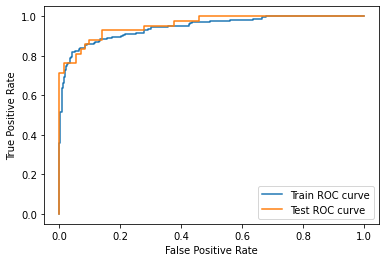

100%|██████████| 30/30 [00:05<00:00,  5.81it/s]

Unspuervised Kmeans AVG Score:
 Train Accuracy     0.888498
Train Precision    0.959018
Train Recall       0.733137
Train F1-Score     0.830604
Train Auc          0.680442
Test Accuracy      0.880117
Test Precision     0.964111
Test Recall        0.700794
Test F1-Score      0.810250
Test Auc           0.680776
dtype: float64


In [268]:
cols = ['Train Accuracy', 'Train Precision', 'Train Recall', 'Train F1-Score', 'Train Auc', 'Test Accuracy',  'Test Precision', 'Test Recall', 'Test F1-Score', 'Test Auc']
unsupervised_stat = pd.DataFrame(columns=cols, index=range(30))
is_plot = True
for i in tqdm(range(30)):
    x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=i, stratify=data_y)
    normalized_x_train = pd.DataFrame(normalize(x_train))
    normalized_x_test = pd.DataFrame(normalize(x_test))
    unsupervised_stat.loc[i] = unsupervised_learning(normalized_x_train, y_train, normalized_x_test, y_test, is_plot)
    is_plot = False
print('Unspuervised Kmeans AVG Score:\n', unsupervised_stat.mean())

iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clustering based on kernels.3 Research what spectral clustering is. Use RBF
kernel with gamma=1 or find a gamma for which the two clutsres have the
same balance as the one in original data set (if the positive class has p and the
negative class has n samples, the two clusters must have p and n members).
Do not label data based on their proximity to cluster center, because spectral
clustering may give you non-convex clusters . Instead, use fit t predict
method.

# Spectral clustering is a technique with roots in graph theory, where the approach is used to identify communities of nodes in a graph based on the edges connecting them. The method is flexible and allows us to cluster non graph data as well.

In [255]:
from sklearn.cluster import SpectralClustering

def unsupervised_learning_spectral(x_train, y_train, x_test, y_test, is_plot):
    labels = SpectralClustering(n_clusters=2, gamma=1, affinity='rbf').fit_predict(x_train)
    #  consider labeling based on the entire points in each cluster
    centers =[]
    for i in [0,1]:
        centers.append(np.mean(x_train[labels==i], axis=0).to_list())

    l_train, l_test = len(x_train), len(x_test)

    train_dis = euclidean_distances(x_train, centers)
    test_dis = euclidean_distances(x_test, centers)
    # Read the true labels of those 30 data points and take a majority poll within them
    y_train = np.array(y_train).reshape((l_train, 1))
    dis_and_label = np.concatenate((train_dis, y_train), axis=1)
    dis_and_label = pd.DataFrame(dis_and_label, columns=['dis_to_center1', 'dis_to_center2', 'label'])
    dis_and_label_1 =dis_and_label.sort_values('dis_to_center1').iloc[:30]
    dis_and_label_2 =dis_and_label.sort_values('dis_to_center2').iloc[:30]
    label1, label2 = dis_and_label_1['label'].value_counts().index[0], dis_and_label_2['label'].value_counts().index[0]

    train_predict = []
    train_predict_prob = []
    for i in range(l_train):
        pred_label = label1 if labels[i]==0 else label2
        train_predict_prob.append([train_dis[i][0],train_dis[i][1]])
        train_predict.append(pred_label)
    train_predict_prob = softmax(train_predict_prob, axis=1).astype(np.float64)
    train_predict_prob = train_predict_prob[:, 0]
    
    test_predict = []
    test_predict_prob = []
    for i in range(l_test):
        pred_label = label1 if test_dis[i][0]<test_dis[i][1] else label2
        test_predict_prob.append([test_dis[i][0],test_dis[i][1]])
        test_predict.append(pred_label)
    test_predict_prob = softmax(test_predict_prob, axis=1).astype(np.float64)
    test_predict_prob = test_predict_prob[:, 0]
    
    # accuracy
    train_accuracy = accuracy_score(train_predict, y_train)
    test_accuracy = accuracy_score(test_predict, y_test)
    # confusion matrix
    train_confusion_matrix = confusion_matrix(y_train, train_predict)
    test_confusion_matrix = confusion_matrix(y_test, test_predict)
    # precision
    train_precision = precision_score(y_train, train_predict)  
    test_precision = precision_score(y_test, test_predict)  
    # recall
    train_recall = recall_score(y_train, train_predict)  
    test_recall = recall_score(y_test, test_predict) 
    # f1
    train_f1 = f1_score(y_train, train_predict)  
    test_f1 = f1_score(y_test, test_predict) 
    # AUC
    train_auc = roc_auc_score(y_train, train_predict_prob)
    test_auc = roc_auc_score(y_test, test_predict_prob)

    if is_plot:
        print('Plot the ROC and report the confusion matrix for training and testing in one of the runs:')
        train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_predict_prob)
        test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_predict_prob)
        print('Train Confusion Matrix:\n', train_confusion_matrix)
        print('Test Confusion Matrix:\n', test_confusion_matrix)
        plt.plot(train_fpr, train_tpr, label='Train ROC curve')
        plt.plot(test_fpr, test_tpr, label='Test ROC curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()
    
    return [train_accuracy, train_precision, train_recall, train_f1, train_auc, test_accuracy, test_precision, test_recall, test_f1, test_auc]

  0%|          | 0/30 [00:00<?, ?it/s]

Plot the ROC and report the confusion matrix for training and testing in one of the runs:
Train Confusion Matrix:
 [[280   5]
 [ 52 118]]
Test Confusion Matrix:
 [[71  1]
 [10 32]]


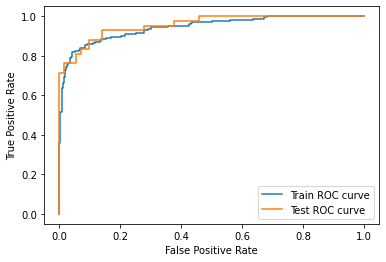

100%|██████████| 30/30 [00:01<00:00, 22.69it/s]

Unspuervised Spectral clustering AVG Score:
 Train Accuracy     0.883297
Train Precision    0.960396
Train Recall       0.717255
Train F1-Score     0.821060
Train Auc          0.741135
Test Accuracy      0.878947
Test Precision     0.964995
Test Recall        0.696825
Test F1-Score      0.808043
Test Auc           0.731459
dtype: float64


In [265]:
cols = ['Train Accuracy', 'Train Precision', 'Train Recall', 'Train F1-Score', 'Train Auc', 'Test Accuracy',  'Test Precision', 'Test Recall', 'Test F1-Score', 'Test Auc']
unsupervised_stat2 = pd.DataFrame(columns=cols, index=range(30))
is_plot = True
for i in tqdm(range(30)):
    x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=i, stratify=data_y)
    normalized_x_train = pd.DataFrame(normalize(x_train))
    normalized_x_test = pd.DataFrame(normalize(x_test))
    unsupervised_stat2.loc[i] = unsupervised_learning_spectral(normalized_x_train, y_train, normalized_x_test, y_test, is_plot)
    is_plot = False
print('Unspuervised Spectral clustering AVG Score:\n', unsupervised_stat2.mean())

v. One can expect that supervised learning on the full data set works better than
semi-supervised learning with half of the data set labeled.One can expect that
unsupervised learning underperforms in such situations. Compare the results
you obtained by those methods.

In [277]:
results = pd.DataFrame({'supervised':supervised_stat.mean(), 
                        'semi_supervised':semi_supervised_stat.mean(),
                        'k_means_cluster_unsupervised':unsupervised_stat.mean(), 
                        'spectral_cluster_unsupervised':unsupervised_stat2.mean()})
results

,supervised,semi_supervised,k_means_cluster_unsupervised,spectral_cluster_unsupervised
Train Accuracy,0.984689,0.995092,0.888498,0.883297
Train Precision,0.987466,0.996623,0.959018,0.960396
Train Recall,0.971373,0.990079,0.733137,0.717255
Train F1-Score,0.979338,0.993327,0.830604,0.821060
Train Auc,0.998648,0.999586,0.680442,0.741135
Test Accuracy,0.961988,0.951462,0.880117,0.878947
Test Precision,0.963305,0.944718,0.964111,0.964995
Test Recall,0.933333,0.923810,0.700794,0.696825
Test F1-Score,0.947430,0.933296,0.810250,0.808043
Test Auc,0.993011,0.988668,0.680776,0.731459


# according to the results,  supervised learning does performs better on test set than semi-supervised learning, unsupervised learning underperforms

2. Active Learning Using Support Vector Machines

(a) Download the banknote authentication Data Set from: https://archive.ics.
uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a
binary classification problem.

In [283]:
data2 = pd.read_csv('../data/Homework 6 Data/data_banknote_authentication.txt', header=None)
dataX = data2.iloc[:,0:4]
dataY = data2[4]
trainX, testX, trainY, testY = train_test_split(dataX, dataY, test_size=472/(900+472))

In [317]:
trainX

,0,1,2,3
678,2.46730,1.39260,1.71250,0.41421
505,2.56500,8.63300,-2.99410,-1.30820
30,-0.24811,-0.17797,4.90680,0.15429
828,-2.59120,-0.10554,1.27980,1.04140
396,2.67990,3.13490,0.34073,0.58489
...,...,...,...,...
92,4.30640,8.20680,-2.78240,-1.43360
593,-2.79140,1.77340,6.77560,-0.39915
655,2.65620,10.70440,-3.30850,-4.07670
168,-1.80300,11.88180,2.04580,-5.27280


(b) Repeat each of the following two procedures 50 times. You will have 50 errors for
90 SVMs per each procedure.

i. Train a SVM with a pool of 10 randomly selected data points from the training
set using linear kernel and L1 penalty. Select the penalty parameter using
5-fold cross validation.4 Repeat this process by adding 10 other randomly 
selected data points to the pool, until you use all the 900 points. Do NOT
replace the samples back into the training set at each step. Calculate the
test error for each SVM. You will have 90 SVMs that were trained using 10,
20, 30, ... , 900 data points and their 90 test errors. You have implemented
passive learning.

In [336]:
def passive_learning(train_x, train_y, test_x, test_y):
    x_select, y_select = pd.DataFrame(), pd.DataFrame()
    random_ids = np.random.randint(0, len(train_x), 10)
    x_select, y_select = train_x.iloc[random_ids], train_y.iloc[random_ids]
    y_ = pd.DataFrame(y_select)
    while len(y_[y_[4]==1])==0 or len(y_[y_[4]==0])==0:
        random_ids = np.random.randint(0, len(train_x), 10)
        x_select, y_select = train_x.iloc[random_ids], train_y.iloc[random_ids]
        y_ = pd.DataFrame(y_select)
    # print(y_select)
    remain_x, remain_y = train_x.drop(train_x.index[random_ids]), train_y.drop(train_x.index[random_ids])
    x_select = x_select.reset_index(drop=True)
    y_select = y_select.reset_index(drop=True)
    remain_x = remain_x.reset_index(drop=True)
    remain_y = remain_y.reset_index(drop=True)

    error=[]
    for i in range(90):
        # print(i, len())
        parameters = {'C': [10**c for c in np.arange(-4, 4, dtype=float)]}
        svc = LinearSVC(penalty='l1', dual=False)
        clf = GridSearchCV(svc, parameters, cv=5, n_jobs=-1)
        clf.fit(x_select, y_select)
        best_C = clf.best_params_['C']

        svc = LinearSVC(penalty='l1', dual=False, C=best_C)
        svc.fit(x_select, y_select)
        error.append(1-svc.score(test_x, test_y))

        if i==89: break
        add_x = remain_x.sample(n=10, axis=0)
        ids = list(add_x.index)
        x_select = pd.concat([x_select, remain_x.iloc[ids]], axis=0)
        y_select = pd.concat([y_select, remain_y.iloc[ids]], axis=0)

        remain_x = remain_x.drop(ids)
        remain_y = remain_y.drop(ids)
        remain_x = remain_x.reset_index(drop=True)
        remain_y = remain_y.reset_index(drop=True)

    return error

passive_errors = []
for i in tqdm(range(50)):
    passive_errors.append(passive_learning(trainX, trainY, testX, testY))
pd.DataFrame(passive_errors)

100%|██████████| 50/50 [04:21<00:00,  5.23s/it]


,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.082627,0.038136,0.014831,0.021186,0.010593,0.010593,0.027542,0.027542,0.012712,0.012712,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
1,0.101695,0.076271,0.076271,0.044492,0.065678,0.044492,0.044492,0.044492,0.019068,0.019068,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.012712,0.012712,0.012712,0.008475,0.008475
2,0.110169,0.084746,0.072034,0.042373,0.036017,0.046610,0.040254,0.027542,0.027542,0.027542,...,0.008475,0.008475,0.008475,0.012712,0.012712,0.012712,0.012712,0.008475,0.008475,0.008475
3,0.131356,0.088983,0.057203,0.063559,0.023305,0.027542,0.029661,0.027542,0.025424,0.025424,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
4,0.122881,0.076271,0.029661,0.069915,0.042373,0.036017,0.025424,0.008475,0.025424,0.008475,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.006356,0.006356
5,0.046610,0.012712,0.023305,0.012712,0.012712,0.012712,0.027542,0.025424,0.023305,0.023305,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.012712,0.012712,0.012712,0.008475,0.008475
6,0.095339,0.112288,0.135593,0.133475,0.063559,0.036017,0.036017,0.012712,0.008475,0.008475,...,0.008475,0.008475,0.008475,0.008475,0.010593,0.008475,0.012712,0.012712,0.012712,0.006356
7,0.082627,0.014831,0.016949,0.016949,0.012712,0.012712,0.012712,0.010593,0.008475,0.008475,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
8,0.080508,0.012712,0.016949,0.019068,0.012712,0.016949,0.016949,0.012712,0.010593,0.008475,...,0.008475,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712
9,0.095339,0.031780,0.023305,0.023305,0.008475,0.008475,0.008475,0.008475,0.008475,0.012712,...,0.008475,0.008475,0.006356,0.006356,0.006356,0.006356,0.012712,0.006356,0.008475,0.008475


ii. Train a SVM with a pool of 10 randomly selected data points from the training
set5 using linear kernel and L1 penalty. Select the parameters of the SVM
with 5-fold cross validation. Choose the 10 closest data points in the training
set to the hyperplane of the SVM6 and add them to the pool. Do not replace
the samples back into the training set. Train a new SVM using the pool.
Repeat this process until all training data is used. You will have 90 SVMs
that were trained using 10, 20, 30,..., 900 data points and their 90 test errors.
You have implemented active learning.

In [337]:
def active_learning(train_x, train_y, test_x, test_y):
    x_select, y_select = pd.DataFrame(), pd.DataFrame()
    random_ids = np.random.randint(0, len(train_x), 10)
    x_select, y_select = train_x.iloc[random_ids], train_y.iloc[random_ids]
    y_ = pd.DataFrame(y_select)
    while len(y_[y_[4]==1])==0 or len(y_[y_[4]==0])==0:
        random_ids = np.random.randint(0, len(train_x), 10)
        x_select, y_select = train_x.iloc[random_ids], train_y.iloc[random_ids]
        y_ = pd.DataFrame(y_select)
    remain_x, remain_y = train_x.drop(train_x.index[random_ids]), train_y.drop(train_x.index[random_ids])
    x_select = x_select.reset_index(drop=True)
    y_select = y_select.reset_index(drop=True)
    remain_x = remain_x.reset_index(drop=True)
    remain_y = remain_y.reset_index(drop=True)

    error=[]
    for i in range(90):
        parameters = {'C': [10**c for c in np.arange(-4, 4, dtype=float)]}
        svc = LinearSVC(penalty='l1', dual=False)
        clf = GridSearchCV(svc, parameters, cv=5, n_jobs=-1)
        clf.fit(x_select, y_select)
        best_C = clf.best_params_['C']

        svc = LinearSVC(penalty='l1', dual=False, C=best_C)
        svc.fit(x_select, y_select)
        error.append(1-svc.score(test_x, test_y))

        if i==89: break
        dis = svc.decision_function(remain_x)
        top_10_ids = np.argsort(abs(dis))[:10]
        x_select = pd.concat([x_select, remain_x.iloc[top_10_ids]], axis=0)
        y_select = pd.concat([y_select, remain_y.iloc[top_10_ids]], axis=0)
        remain_x = remain_x.drop(top_10_ids)
        remain_y = remain_y.drop(top_10_ids)
        remain_x = remain_x.reset_index(drop=True)
        remain_y = remain_y.reset_index(drop=True)

    return error

active_errors = []
for i in tqdm(range(50)):
    active_errors.append(active_learning(trainX, trainY, testX, testY))
pd.DataFrame(active_errors)

100%|██████████| 50/50 [04:16<00:00,  5.12s/it]


,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.463983,0.080508,0.027542,0.014831,0.006356,0.010593,0.010593,0.008475,0.008475,0.012712,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
1,0.135593,0.023305,0.023305,0.048729,0.019068,0.014831,0.016949,0.012712,0.008475,0.006356,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.008475
2,0.241525,0.050847,0.008475,0.046610,0.036017,0.014831,0.023305,0.008475,0.008475,0.008475,...,0.012712,0.006356,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
3,0.065678,0.052966,0.040254,0.019068,0.010593,0.008475,0.006356,0.002119,0.006356,0.012712,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
4,0.125000,0.078390,0.061441,0.023305,0.025424,0.021186,0.006356,0.012712,0.008475,0.008475,...,0.008475,0.008475,0.006356,0.006356,0.012712,0.006356,0.006356,0.008475,0.008475,0.008475
5,0.127119,0.095339,0.027542,0.012712,0.019068,0.012712,0.008475,0.008475,0.006356,0.012712,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
6,0.135593,0.019068,0.031780,0.008475,0.008475,0.008475,0.008475,0.008475,0.006356,0.012712,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.008475
7,0.127119,0.016949,0.059322,0.014831,0.012712,0.008475,0.008475,0.006356,0.008475,0.012712,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.008475,0.008475
8,0.161017,0.086864,0.040254,0.021186,0.016949,0.016949,0.014831,0.008475,0.012712,0.008475,...,0.012712,0.012712,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
9,0.065678,0.029661,0.019068,0.021186,0.012712,0.008475,0.008475,0.008475,0.008475,0.012712,...,0.008475,0.008475,0.008475,0.006356,0.006356,0.008475,0.008475,0.008475,0.008475,0.008475


(c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i
and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot
average test error versus number of training instances for both active and passive
learners on the same figure and report your conclusions. Here, you are actually
obtaining a learning curve by Monte-Carlo simulation.

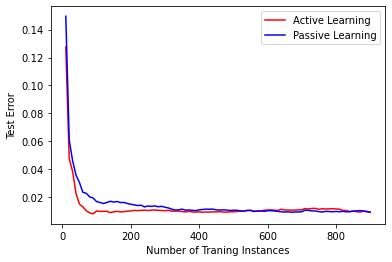

In [340]:
plt.plot([i*10 for i in range(1,91)], pd.DataFrame(active_errors).mean(), c='r', label='Active Learning')
plt.plot([i*10 for i in range(1,91)], pd.DataFrame(passive_errors).mean(), c='b', label='Passive Learning')
plt.xlabel('Number of Traning Instances')
plt.ylabel('Test Error')
plt.legend()
plt.show()

# My conclusion is when train data increases, the test error decreases much faster using active learning, compared to passive leaerning. Active learning can achieve a better result when we have limited label ability.